<a href="https://colab.research.google.com/github/dhanasekar333/codsoft/blob/new/IMDB_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.stem import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder


# Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep = ':::', names = ['Title', 'Genre', 'Description'], engine = 'python')

In [ ]:
train_data.head(10)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [ ]:
train_data.tail(10)

,Title,Genre,Description
54205,Pogrindis.NET (2013),short,Young looser filmmaker tries to produce a fil...
54206,Counting Sheep (2004),documentary,Bighorn sheep once roamed the Sierra Nevada i...
54207,The Devin Townsend Project: By a Thread - Liv...,music,"In November 2011, The Devin Townsend Project ..."
54208,Kaçamak (1988),drama,A man and woman meet during the identificatio...
54209,Izpiti po nikoe vreme (1974),family,"First story, ""Temptation"": Two kids find a wa..."
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [ ]:
train_data.shape

(54214, 3)

In [ ]:
train_data.isna().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


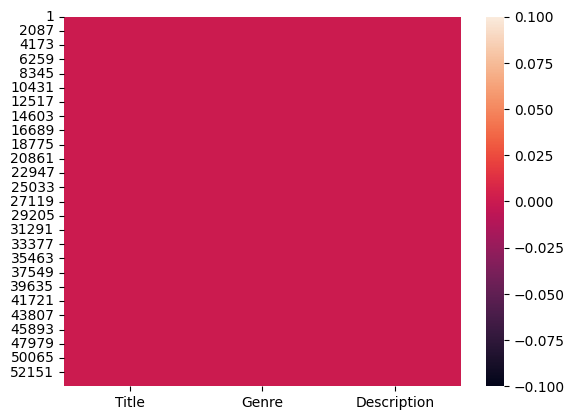

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [ ]:
dup_data=train_data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Genre'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4457253527621507


In [ ]:
user_input = input("Enter a movie description: ")

# Predict genre based on user input
predicted_genre = model.predict([user_input])
print("Predicted Genre:", predicted_genre[0])



Enter a movie description: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.
Predicted Genre:  drama 
